In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
from scipy import stats

# 統計モデルを推定するライブラリ
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pmdarima as pm

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
# NumPy配列の表示設定
# np.set_printoptions: NumPy配列をprint()したときの表示形式を制御する
#   linewidth=80 : 1行あたり80文字を超えたら改行して表示する
np.set_printoptions(linewidth=80)

# pandasデータフレームの表示設定
# pd.set_option("display.width", 80): データフレームをprint()したときに
#   横幅80文字を基準に出力を折り返すようにする
pd.set_option("display.width", 80)

# グラフ描画ライブラリの設定
from matplotlib.pylab import rcParams

# rcParams: matplotlibの全体的な描画スタイルを管理する設定辞書
# "figure.figsize": デフォルトの図の大きさ (幅, 高さ) を指定
#   ここでは横幅8インチ × 高さ4インチのサイズに固定
rcParams["figure.figsize"] = 8, 4

In [3]:
# データの読み込み
df1 = pd.read_csv("2-3-1-sample-data-1.csv")
print(df1.head(3))

        x
0  14.873
1   8.165
2   8.415


In [4]:
print(df1.describe())

               x
count  30.000000
mean    9.820100
std     3.079053
min     3.095000
25%     7.774250
50%     9.367500
75%    12.384000
max    15.234000


<Axes: xlabel='x', ylabel='Count'>

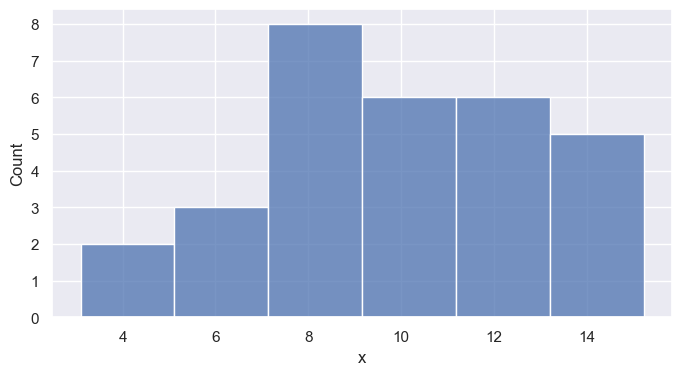

In [5]:
sns.histplot(df1['x'])

In [ ]:
# 平均値の区間推定（信頼区間の計算）

# sm.stats.DescrStatsW:
#   statsmodels の記述統計クラス
#   引数にデータを与えると平均・標準偏差・信頼区間などを計算できる
# df1["x"]:
#   データフレーム df1 の列 "x" を取り出して解析対象とする
dsw1 = sm.stats.DescrStatsW(df1["x"])

# 標本平均を出力
# round(..., 3): 小数点以下3桁に丸める
print("標本平均", round(dsw1.mean, 3))

# 標準偏差を出力
# データのばらつきの大きさを表す
print("標準偏差", round(dsw1.std, 3))

# 標準誤差を出力
# 標本平均が母平均からどの程度ブレるかを表す
print("標準誤差", round(dsw1.std_mean, 3))

# 平均値の95%信頼区間を出力
# tconfint_mean(alpha=0.05):
#   有意水準 0.05（=信頼水準95%）での母平均の区間推定
# np.round(..., 3): 信頼区間の下限・上限を小数点3桁で丸める
print("95％区間", np.round(dsw1.tconfint_mean(alpha=0.05), 3))

標本平均 9.82
標準偏差 3.027
標準誤差 0.562
95％区間 [ 8.67 10.97]


In [ ]:
# 母平均に対するt検定（片側・両側検定の指定も可能）

# dsw1.ttest_mean:
#   母平均に対するt検定を行うメソッド
#   引数:
#     value=10 → 帰無仮説 H0: 母平均 = 10
#     alternative="two-sided" → 両側検定を実施
#       （H0: 平均=10 に対して H1: 平均≠10 を検証する）
#
# 戻り値はタプルで (t値, p値, 自由度)
#   t値 : 標本平均が帰無仮説の平均からどの程度離れているかを示す統計量
#   p値 : 帰無仮説が正しいときに、これ以上に極端な結果が得られる確率
#   df  : 自由度（標本サイズ - 1）
#
# np.round(..., 3) : 出力結果を小数点3桁に丸める
np.round(dsw1.ttest_mean(value=10, alternative="two-sided"), 3)

array([-0.32 ,  0.751, 29.   ])

In [ ]:
# 母平均に対するt検定（片側検定の例）

# alternative="larger":
#   帰無仮説 H0: 母平均 = 10
#   対立仮説 H1: 母平均 > 10 （平均が10より大きいかどうかを検証する片側検定）
# 戻り値は (t値, p値, 自由度)
print(np.round(dsw1.ttest_mean(value=10, alternative="larger"), 3))

# alternative="smaller":
#   帰無仮説 H0: 母平均 = 10
#   対立仮説 H1: 母平均 < 10 （平均が10より小さいかどうかを検証する片側検定）
# 戻り値は (t値, p値, 自由度)
print(np.round(dsw1.ttest_mean(value=10, alternative="smaller"), 3))

[-0.32   0.624 29.   ]
[-0.32   0.376 29.   ]


In [ ]:
# CSVファイルからデータを読み込み
# "2-3-1-sample-data-1.csv" というファイルを読み込み、
# データフレーム df1 として保持する
df1 = pd.read_csv("2-3-1-sample-data-1.csv")

# DescrStatsW で統計量を計算
# df1["x"]: データフレーム df1 の列 "x" を解析対象に指定
# dsw1 には平均・標準偏差・t検定などの統計手法が使えるオブジェクトが格納される
dsw1 = sm.stats.DescrStatsW(df1["x"])

# 母平均に対する両側t検定を実行
#   帰無仮説 H0: 母平均 = 10
#   対立仮説 H1: 母平均 ≠ 10
# np.round(..., 3): 結果 (t値, p値, 自由度) を小数点3桁で丸めて表示
np.round(dsw1.ttest_mean(value=10, alternative="two-sided"), 3)

array([-0.32 ,  0.751, 29.   ])